In [1]:
import pandas as pd
import os

from pyspark.sql import SparkSession
import numpy as np

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

import pyspark
from pyspark.ml import feature, regression, Pipeline
from pyspark.sql import functions as fn, Row
from pyspark import sql

import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

from datetime import datetime
from pyspark.sql.functions import col,udf
from pyspark.sql.types import DateType
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
import matplotlib.pyplot as plt


In [ ]:
raw_weather_holiday_merged = pd.read_excel("/Users/apsharma/IST718 Dropbox/IST 718 Project/Weather Data/2015_weather_holiday_merged.xlsx")
raw_weather_holiday_merged["pickup_date"] = pd.to_datetime(raw_weather_holiday_merged['pickup_date'], format="%d.%m.%y", errors='coerce')
raw_weather_holiday_merged.head()

In [ ]:
raw_weather_holiday_merged = spark.createDataFrame(raw_weather_holiday_merged)
raw_weather_holiday_merged = raw_weather_holiday_merged.withColumn("date_only", fn.to_date(fn.col("pickup_date")))
raw_weather_holiday_merged.show()

In [ ]:
weather_holiday_data_clean = raw_weather_holiday_merged

In [ ]:
raw_Jan_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST 718 Project/Taxi Data/2015-01_100k.csv")
raw_Feb_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST 718 Project/Taxi Data/2015-02_100k.csv")
raw_Mar_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST 718 Project/Taxi Data/2015-03_100k.csv")
raw_Apr_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST 718 Project/Taxi Data/2015-04_100k.csv")
raw_May_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST 718 Project/Taxi Data/2015-05_100k.csv")
raw_Jun_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST 718 Project/Taxi Data/2015-06_100k.csv")
raw_Jul_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST 718 Project/Taxi Data/2015-07_100k.csv")
raw_Aug_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST 718 Project/Taxi Data/2015-08_100k.csv")
raw_Sep_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST 718 Project/Taxi Data/2015-09_100k.csv")
raw_Oct_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST 718 Project/Taxi Data/2015-10_100k.csv")
raw_Nov_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST 718 Project/Taxi Data/2015-11_100k.csv")
raw_Dec_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST 718 Project/Taxi Data/2015-12_100k.csv")


In [ ]:
frames = [raw_Jan_Data1,raw_Feb_Data1,raw_Mar_Data1,raw_Apr_Data1,raw_May_Data1,raw_Jun_Data1,raw_Jul_Data1,
          raw_Aug_Data1,raw_Sep_Data1,raw_Oct_Data1,raw_Nov_Data1,raw_Dec_Data1]

In [ ]:
Full_DataPD = pd.concat(frames)

In [ ]:
Full_DataPD1=Full_DataPD
Full_DataPD1 = spark.createDataFrame(Full_DataPD1)

In [ ]:
Full_DataPD2 = Full_DataPD1.withColumn("date_only", fn.to_date(fn.col("pickup_datetime")))
Full_DataPD2.limit(20).show(3)

In [ ]:
Merged_FULL_data = weather_holiday_data_clean.join(Full_DataPD2, ['date_only'], how='full') #execute this when needed
## Important --  Merged_FULL_data = Full_DataPD2.join(weather_holiday_data_clean, ['date_only'], how='left') #not working

In [ ]:
training_df, validation_df, testing_df = Merged_FULL_data.randomSplit([0.6, 0.3, 0.1], seed=0)

In [ ]:
##training_df.write.csv('Training_Data_one.csv') #Saves in Parts !
training_df.toPandas().to_csv("Training_Data_Final.csv", header=True)

In [ ]:
##validation_df.write.csv('Validation_Data_one.csv')
validation_df.toPandas().to_csv("Validation_Data_Final.csv", header=True)

In [ ]:
##testing_df.write.csv('Testing_Data_one.csv')
testing_df.toPandas().to_csv("Testing_Data_Final.csv", header=True)

In [ ]:
print("# points in Merged_FULL_data: ", Merged_FULL_data.count()) #must be 12 Million rows

In [ ]:
print("# points in training: ", training_df.count()) #must be 719469 rows

In [ ]:
print("# points in validation: ", validation_df.count()) #must be 360063 rows

In [ ]:
print("# points in testing: ", testing_df.count()) #must be 120468 rows

In [ ]:
Merged_FULL_data.write.csv('Merged_FULL_data.csv')

In [ ]:
Merged_FULL_data.coalesce(1).write.option("header", "true").csv("Merged_FULL_data_Final.csv")

In [ ]:
### ----------------------START BELOW !--------------------- ####

In [ ]:
Read_Merged_Data = pd.read_csv("/Users/apsharma/IST718 Dropbox/Apurva Sharma/Merged_Data_Nov9.csv")

In [ ]:
len(Read_Merged_Data.columns)

In [ ]:
Read_Merged_Data1 = Read_Merged_Data

In [ ]:
Read_Merged_Data2 = spark.createDataFrame(Read_Merged_Data1)

In [ ]:
Read_Merged_Data2.printSchema()

In [ ]:
#Train_Data1.show(2)

In [ ]:
from pyspark.sql.functions import isnan, when, count, col

Read_Merged_Data2.select([count(when(isnan(c), c)).alias(c) for c in Read_Merged_Data2.columns]).show()

In [ ]:
Read_Merged_Data2 = Read_Merged_Data2.drop("Unnamed: 0")

In [ ]:
Read_Merged_Data2.printSchema()

In [ ]:
len(Read_Merged_Data2.columns)

In [ ]:
Read_Merged_Data2.toPandas().head(10)

In [ ]:
dummy_df = Read_Merged_Data2.select('pickup_borough',
                           fn.when(fn.col('pickup_borough')=='Manhattan',1).otherwise(0).alias('Pickup_Manhattan'),
                           fn.when(fn.col('pickup_borough')=='Brooklyn',1).otherwise(0).alias('Pickup_Brooklyn'),
                           fn.when(fn.col('pickup_borough')=='Queens',1).otherwise(0).alias('Pickup_Queens'),
                           fn.when(fn.col('pickup_borough')=='Bronx',1).otherwise(0).alias('Pickup_Bronx'),
                           'dropoff_borough',
                           fn.when(fn.col('dropoff_borough')=='Manhattan',1).otherwise(0).alias('DropOff_Manhattan'),
                           fn.when(fn.col('dropoff_borough')=='Brooklyn',1).otherwise(0).alias('DropOff_Brooklyn'),
                           fn.when(fn.col('dropoff_borough')=='Queens',1).otherwise(0).alias('DropOff_Queens'),
                           fn.when(fn.col('dropoff_borough')=='Bronx',1).otherwise(0).alias('DropOff_Bronx'),
                           '*'
                          )
dummy_df = dummy_df.drop('pickup_borough','dropoff_borough')
#dummy_df.show(2)

In [ ]:
dummy_df.toPandas().head(5)

In [ ]:
dummy_df = dummy_df.drop("date_only","pickup_date")
len(dummy_df.columns)

In [ ]:
from pyspark.sql.types import TimestampType

dummy_df = dummy_df.withColumn("pickup_datetime", dummy_df['pickup_datetime'].cast(TimestampType()))
dummy_df = dummy_df.withColumn("dropoff_datetime", dummy_df['dropoff_datetime'].cast(TimestampType()))

#dummy_df.printSchema()

In [ ]:
dummy_df.toPandas().head()

In [ ]:
#dummy_df.select("pickup_datetime").show(5)
#dummy_df.select("dropoff_datetime").show(5)

In [ ]:
#Check distinct rateCodeID

#dummy_df.select('RateCodeID').distinct().collect()

In [ ]:
# base is 99
dummy_df= dummy_df.select(fn.when(fn.col('RateCodeID')=='1',1).otherwise(0).alias('RateCode_stdrate'), 
                           fn.when(fn.col('RateCodeID')=='2',1).otherwise(0).alias('RateCode_JFK'),
                           fn.when(fn.col('RateCodeID')=='3',1).otherwise(0).alias('RateCode_Newark'), 
                           fn.when(fn.col('RateCodeID')=='4',1).otherwise(0).alias('RateCode_Nassau_W'),
                           fn.when(fn.col('RateCodeID')=='5',1).otherwise(0).alias('RateCode_Negotiated'), 
                           fn.when(fn.col('RateCodeID')=='6',1).otherwise(0).alias('RateCode_Group'),
                         '*')
dummy_df=dummy_df.drop('RateCodeID')

In [ ]:
len(dummy_df.columns)

In [ ]:
#base is unknown #5
dummy_df = dummy_df.select('*',fn.when(fn.col('payment_type') == '1',1).otherwise(0).alias('ptype_CCard'),
                           fn.when(fn.col('payment_type') == '2',1).otherwise(0).alias('ptype_cash'),
                           fn.when(fn.col('payment_type') == '3',1).otherwise(0).alias('ptype_nocharge'),
                           fn.when(fn.col('payment_type') == '4',1).otherwise(0).alias('ptype_dispute'),
                           fn.when(fn.col('payment_type') == '6',1).otherwise(0).alias('ptype_voidtrip'))
dummy_df = dummy_df.drop('payment_type')

In [ ]:
len(dummy_df.columns)

In [ ]:
#base is No
dummy_df= dummy_df.select(fn.when(fn.col('store_and_fwd_flag')=='Y',1).otherwise(0).alias('store_and_fwd_flag_1_0'),'*')
dummy_df = dummy_df.drop('store_and_fwd_flag')

In [ ]:
len(dummy_df.columns)

In [ ]:
#base is 2
dummy_df= dummy_df.select(fn.when(fn.col('VendorID')=='1',1).otherwise(0).alias('VendorID_1_0'),'*')
dummy_df=dummy_df.drop('VendorID')

In [ ]:
len(dummy_df.columns)

In [ ]:
from pyspark.sql import functions as F
timeFmt = "yyyy-MM-dd'T'HH:mm:ss.SSS"
timeDiff = (F.unix_timestamp(dummy_df.dropoff_datetime, format=timeFmt)
            - F.unix_timestamp(dummy_df.pickup_datetime, format=timeFmt))
#dummy_df = dummy_df.wfrom pyspark.sql import functions as F
timeFmt = "yyyy-MM-dd'T'HH:mm:ss.SSS"
timeDiff = (F.unix_timestamp(dummy_df.dropoff_datetime, format=timeFmt)
            - F.unix_timestamp(dummy_df.pickup_datetime, format=timeFmt))
dummy_df = dummy_df.withColumn("Duration", timeDiff)

In [ ]:
len(dummy_df.columns)

In [ ]:
#Conversion from long into int
dummy_df.printSchema()

In [ ]:
dummy_df = dummy_df.withColumn('Duration', fn.col('Duration').cast('int'))
dummy_df = dummy_df.withColumn('avg_temp_C', fn.col('Duration').cast('int'))
dummy_df = dummy_df.withColumn('passenger_count', fn.col('Duration').cast('int'))

In [ ]:
dummy_df.printSchema()

In [ ]:
# 50 Columns written - Full Merged Transformed Dataset
dummy_df.toPandas().to_csv("50Columns_dummy_df_Nov9.csv", header=True)

In [ ]:
dummy_df_50 = dummy_df

In [ ]:
########################---------------READ DATA 50 COLUMNS---------------###################################

In [269]:
dummy_df_50 = pd.read_csv("/Users/apsharma/IST718 Dropbox/Apurva Sharma/50Columns_dummy_df_Nov9.csv")

In [270]:
dummy_df_50 = spark.createDataFrame(dummy_df_50)

In [271]:
dummy_df_50.printSchema()

root
 |-- Unnamed: 0: long (nullable = true)
 |-- VendorID_1_0: long (nullable = true)
 |-- store_and_fwd_flag_1_0: long (nullable = true)
 |-- RateCode_stdrate: long (nullable = true)
 |-- RateCode_JFK: long (nullable = true)
 |-- RateCode_Newark: long (nullable = true)
 |-- RateCode_Nassau_W: long (nullable = true)
 |-- RateCode_Negotiated: long (nullable = true)
 |-- RateCode_Group: long (nullable = true)
 |-- Pickup_Manhattan: long (nullable = true)
 |-- Pickup_Brooklyn: long (nullable = true)
 |-- Pickup_Queens: long (nullable = true)
 |-- Pickup_Bronx: long (nullable = true)
 |-- DropOff_Manhattan: long (nullable = true)
 |-- DropOff_Brooklyn: long (nullable = true)
 |-- DropOff_Queens: long (nullable = true)
 |-- DropOff_Bronx: long (nullable = true)
 |-- avg_temp_C: long (nullable = true)
 |-- Rain: long (nullable = true)
 |-- Fog: long (nullable = true)
 |-- Snow: long (nullable = true)
 |-- Holiday: long (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dr

In [272]:
dummy_df_50 = dummy_df_50.drop("Unnamed: 0")
dummy_df_50.printSchema()

root
 |-- VendorID_1_0: long (nullable = true)
 |-- store_and_fwd_flag_1_0: long (nullable = true)
 |-- RateCode_stdrate: long (nullable = true)
 |-- RateCode_JFK: long (nullable = true)
 |-- RateCode_Newark: long (nullable = true)
 |-- RateCode_Nassau_W: long (nullable = true)
 |-- RateCode_Negotiated: long (nullable = true)
 |-- RateCode_Group: long (nullable = true)
 |-- Pickup_Manhattan: long (nullable = true)
 |-- Pickup_Brooklyn: long (nullable = true)
 |-- Pickup_Queens: long (nullable = true)
 |-- Pickup_Bronx: long (nullable = true)
 |-- DropOff_Manhattan: long (nullable = true)
 |-- DropOff_Brooklyn: long (nullable = true)
 |-- DropOff_Queens: long (nullable = true)
 |-- DropOff_Bronx: long (nullable = true)
 |-- avg_temp_C: long (nullable = true)
 |-- Rain: long (nullable = true)
 |-- Fog: long (nullable = true)
 |-- Snow: long (nullable = true)
 |-- Holiday: long (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)

In [273]:
#CORRELATION MATRIX:

In [274]:
#a peek of the first five observations in Pandas
import pandas as pd
pd.DataFrame(dummy_df_50.take(30), columns=dummy_df_50.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
VendorID_1_0,1,1,0,1,0,1,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
store_and_fwd_flag_1_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RateCode_stdrate,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
RateCode_JFK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RateCode_Newark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RateCode_Nassau_W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RateCode_Negotiated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RateCode_Group,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pickup_Manhattan,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Pickup_Brooklyn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
dummy_df_50.printSchema()

root
 |-- VendorID_1_0: long (nullable = true)
 |-- store_and_fwd_flag_1_0: long (nullable = true)
 |-- RateCode_stdrate: long (nullable = true)
 |-- RateCode_JFK: long (nullable = true)
 |-- RateCode_Newark: long (nullable = true)
 |-- RateCode_Nassau_W: long (nullable = true)
 |-- RateCode_Negotiated: long (nullable = true)
 |-- RateCode_Group: long (nullable = true)
 |-- Pickup_Manhattan: long (nullable = true)
 |-- Pickup_Brooklyn: long (nullable = true)
 |-- Pickup_Queens: long (nullable = true)
 |-- Pickup_Bronx: long (nullable = true)
 |-- DropOff_Manhattan: long (nullable = true)
 |-- DropOff_Brooklyn: long (nullable = true)
 |-- DropOff_Queens: long (nullable = true)
 |-- DropOff_Bronx: long (nullable = true)
 |-- avg_temp_C: long (nullable = true)
 |-- Rain: long (nullable = true)
 |-- Fog: long (nullable = true)
 |-- Snow: long (nullable = true)
 |-- Holiday: long (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)

In [276]:
#Summary Statistics
numeric_features = [t[0] for t in dummy_df_50.dtypes if t[1] == 'double' or t[1] == 'int' or t[1] == 'long']

In [277]:
Summary_df_50 = dummy_df_50.select(numeric_features).describe().toPandas()
Summary_df_50.transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
trip_distance,60000,2.527140500000003,2.480902905445284,0.0,37.63
pickup_longitude,60000,-73.97808141276042,0.025307172456139723,-74.02828216552734,-73.72350311279298
pickup_latitude,60000,40.75314960632324,0.023113807549042676,40.59992980957031,40.884559631347656
dropoff_longitude,60000,-73.97557020924886,0.027446980173156738,-74.18946075439453,-73.70897674560547
dropoff_latitude,60000,40.75327129694621,0.028975322924005613,40.539329528808594,40.90888977050781
fare_amount,60000,11.597669666666665,7.612193472386103,0.01,140.0
extra,60000,0.32069166666666665,0.36283129556269855,0.0,1.5
mta_tax,60000,0.4998,0.009998083117666461,0.0,0.5
tip_amount,60000,1.5406081666666647,1.9613500444081668,0.0,105.8


In [278]:
len(Summary_df_50.columns)

13

In [279]:
#Correlations between independent variables.
numeric_data = dummy_df_50.select(numeric_features).toPandas()

In [280]:
from pyspark.mllib.stat import Statistics
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

In [281]:
va = feature.VectorAssembler(inputCols=['avg_temp_C','VendorID_1_0',
                                        'passenger_count', 'trip_distance','store_and_fwd_flag_1_0',
                                        'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
                                        'extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge',
                                        'total_amount','pickup_zip','dropoff_zip',
                                        'pickup_dayofweek', 'pickup_hour', 'pickup_month','Pickup_Queens','Pickup_Brooklyn',
                                        'Pickup_Manhattan','Pickup_Bronx','DropOff_Queens','DropOff_Brooklyn',
                                        'DropOff_Manhattan','DropOff_Bronx','ptype_CCard','ptype_cash','ptype_nocharge',
                                        'ptype_dispute','ptype_voidtrip','RateCode_stdrate','RateCode_JFK',
                                        'RateCode_Newark','RateCode_Nassau_W','RateCode_Negotiated','RateCode_Group',
                                        'Duration'] , outputCol='features')

In [282]:
features_sample_df = va.transform(dummy_df_50)

from pyspark.ml.stat import Correlation
r1 = Correlation.corr(features_sample_df, 'features').head()

In [283]:
r1[0].toArray()

array([[ 1.        , -0.00915762,  1.        , ...,  0.00636408,
                nan,  1.        ],
       [-0.00915762,  1.        , -0.00915762, ...,  0.00276325,
                nan, -0.00915762],
       [ 1.        , -0.00915762,  1.        , ...,  0.00636408,
                nan,  1.        ],
       ...,
       [ 0.00636408,  0.00276325,  0.00636408, ...,  1.        ,
                nan,  0.00636408],
       [        nan,         nan,         nan, ...,         nan,
         1.        ,         nan],
       [ 1.        , -0.00915762,  1.        , ...,  0.00636408,
                nan,  1.        ]])

In [284]:
type(r1)

pyspark.sql.types.Row

In [285]:
############Correlation in Pandas --------------------

dummy_df_50Pandas = dummy_df_50.toPandas()


In [286]:
dummy_df_50Pandas1 = dummy_df_50Pandas.drop(columns=["RateCode_Nassau_W","RateCode_Group","ptype_voidtrip","VendorID_1_0",
                                                   "store_and_fwd_flag_1_0","RateCode_Newark","RateCode_Negotiated","ptype_nocharge",
                                                    "ptype_dispute"])

In [287]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
#df = pd.DataFrame(rs.rand(10, 10))
corr = dummy_df_50Pandas1.corr()
corr.style.background_gradient()

,RateCode_stdrate,RateCode_JFK,Pickup_Manhattan,Pickup_Brooklyn,Pickup_Queens,Pickup_Bronx,DropOff_Manhattan,DropOff_Brooklyn,DropOff_Queens,DropOff_Bronx,avg_temp_C,Rain,Fog,Snow,Holiday,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,dropoff_zip,pickup_dayofweek,pickup_hour,pickup_month,ptype_CCard,ptype_cash,Duration
RateCode_stdrate,1,-0.852057,0.0776973,-0.0109349,-0.0844052,-0.014042,0.0221979,0.00266289,-0.0344696,-0.00245409,-0.0755265,-0.00124698,0.000353631,0.00566776,-0.00678745,-0.0755265,-0.102938,-0.0943213,0.043682,-0.0400439,0.0180181,-0.189247,0.0334649,0.376546,-0.0564559,-0.10645,0.00325373,-0.174821,-0.0818562,-0.0259852,0.00129423,-0.00349507,-0.00420372,0.00831265,-0.00338206,-0.0755265
RateCode_JFK,-0.852057,1,-0.0767881,0.00312246,0.0883144,0.0168271,-0.0164749,-0.00740969,0.0330551,-0.00259913,0.0846204,0.00343467,0.00265927,-0.00321678,0.010317,0.0846204,0.117481,0.0990605,-0.0421925,0.0376737,-0.0156196,0.180094,-0.0299906,0.000678759,0.0673067,0.121831,-0.00470961,0.17183,0.0813176,0.0210654,-0.00336436,0.0085764,0.00380031,-0.00333601,0.00153045,0.0846204
Pickup_Manhattan,0.0776973,-0.0767881,1,-0.55179,-0.810593,-0.115993,0.33508,-0.262148,-0.199397,-0.0378948,-0.221751,7.70599e-05,-0.000356359,0.00871506,-0.00696935,-0.221751,-0.359219,-0.642319,0.101453,-0.177645,0.132695,-0.32198,-0.00649041,0.0099805,-0.204661,-0.386404,-0.000742741,-0.344978,-0.987124,-0.332538,-0.00663965,0.0247004,-0.00323209,0.00265596,-0.00150098,-0.221751
Pickup_Brooklyn,-0.0109349,0.00312246,-0.55179,1,-0.0255067,-0.00364991,-0.2898,0.394738,0.0102943,-0.00840373,0.00978892,-0.00152231,0.00624924,0.00265696,0.0031881,0.00978892,0.0399072,0.0384556,-0.342232,0.0444321,-0.217444,0.0287799,0.0181272,-0.0102347,0.00787351,-0.0139372,-0.00747119,0.0241957,0.518738,0.290789,0.0332643,-0.0430667,-0.0106445,-0.00859685,0.00842388,0.00978892
Pickup_Queens,-0.0844052,0.0883144,-0.810593,-0.0255067,1,-0.00536181,-0.197505,0.0442984,0.233771,0.0238811,0.260995,0.00156581,-0.00331162,-0.0123641,0.00597931,0.260995,0.404796,0.739067,0.0992708,0.175846,-0.0193541,0.3677,-0.00453958,-0.00506228,0.243812,0.476842,0.00579882,0.399381,0.829893,0.19836,-0.0160594,0.00247905,0.0121252,0.00494157,-0.0060662,0.260995
Pickup_Bronx,-0.014042,0.0168271,-0.115993,-0.00364991,-0.00536181,1,-0.0475226,-0.00604882,0.00350956,0.187652,0.0048181,-0.0040606,-0.00401068,-0.000221164,0.00166064,0.0048181,0.0165709,0.0807805,0.104189,0.0566881,0.0648903,0.0147537,-0.00124774,0.000554098,-0.00988221,0.00476562,0.00193373,0.0103553,0.0354605,0.0163899,0.00679243,-0.0167948,-0.00554441,-0.0147615,0.0137248,0.0048181
DropOff_Manhattan,0.0221979,-0.0164749,0.33508,-0.2898,-0.197505,-0.0475226,1,-0.687138,-0.644804,-0.24103,-0.305963,-0.0027955,0.00121772,0.00690874,-0.0157125,-0.305963,-0.480248,-0.133292,0.144776,-0.566592,0.282532,-0.425026,-0.0515473,0.0167434,-0.230071,-0.241905,-0.00307049,-0.42028,-0.316117,-0.97794,-0.0338412,0.0821167,-0.0062604,-0.00795477,0.00991825,-0.305963
DropOff_Brooklyn,0.00266289,-0.00740969,-0.262148,0.394738,0.0442984,-0.00604882,-0.687138,1,-0.0447493,-0.0167275,0.196108,0.00238395,0.000615938,0.00269243,0.0078219,0.196108,0.253415,0.0161282,-0.230262,0.0775628,-0.496315,0.234992,0.0600965,-0.00762823,0.138885,0.0144166,0.00258433,0.223402,0.248145,0.687477,0.0331504,-0.034689,-0.000789481,0.0282746,-0.0291888,0.196108
DropOff_Queens,-0.0344696,0.0330551,-0.199397,0.0102943,0.233771,0.00350956,-0.644804,-0.0447493,1,-0.0156969,0.205511,0.00317672,-0.000426431,-0.0130406,0.0103201,0.205511,0.363462,0.155244,0.00483706,0.667844,0.0201727,0.313374,0.00655589,-0.0128537,0.179113,0.315863,0.000887211,0.325194,0.191444,0.678458,0.0113556,-0.0706014,0.0113425,-0.00976069,0.00815884,0.205511
DropOff_Bronx,-0.00245409,-0.00259913,-0.0378948,-0.00840373,0.0238811,0.187652,-0.24103,-0.016727

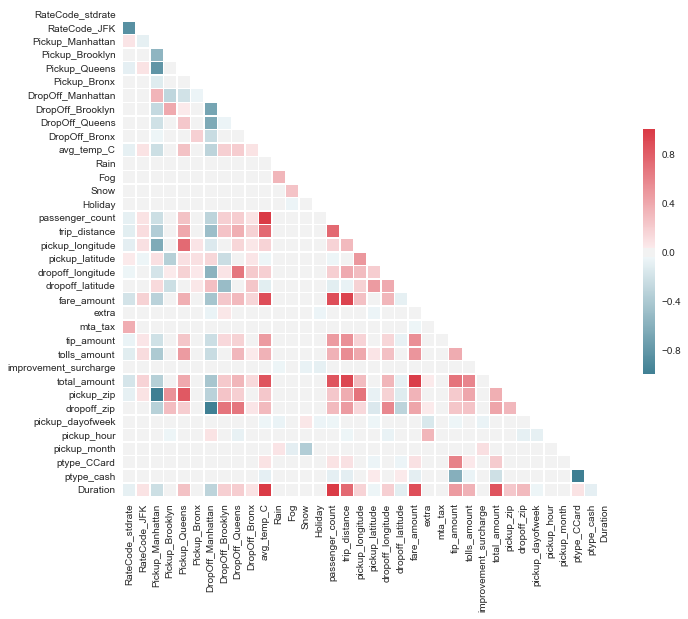

In [288]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# # Generate a large random dataset
# rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = dummy_df_50Pandas1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [289]:
#######################---------Min Max Scaling--------------------------------------------------#########

In [290]:
pd.DataFrame(dummy_df_50.take(30), columns=dummy_df_50.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
VendorID_1_0,1,1,0,1,0,1,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
store_and_fwd_flag_1_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RateCode_stdrate,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
RateCode_JFK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RateCode_Newark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RateCode_Nassau_W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RateCode_Negotiated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RateCode_Group,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pickup_Manhattan,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Pickup_Brooklyn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [291]:
dummy_df_50 = dummy_df_50.drop("RateCode_Nassau_W","RateCode_Group","ptype_voidtrip","VendorID_1_0",
                                        "store_and_fwd_flag_1_0","RateCode_Newark","RateCode_Negotiated",
                                        "ptype_nocharge","ptype_dispute","pickup_dayofweek")

In [292]:
#Apply min-max scaling : Duration, total_amount,improvement_surcharge,fare_amount,trip_distance,passenger_count,avg_temp_C,extra
#mta_tax,tip_amount,tolls_amount

Duration_stats = dummy_df_50.select(fn.min('Duration').alias('min_Duration'),fn.max('Duration').alias('max_Duration')).first()
total_amount_stats= dummy_df_50.select(fn.min('total_amount').alias('min_total_amount'),fn.max('total_amount').alias('max_total_amount')).first()
improvement_surcharge_stats=dummy_df_50.select(fn.min('improvement_surcharge').alias('min_improvement_surcharge'),fn.max('improvement_surcharge').alias('max_improvement_surcharge')).first()
fare_amount_stats=dummy_df_50.select(fn.min('fare_amount').alias('min_fare_amount'),fn.max('fare_amount').alias('max_fare_amount')).first()
trip_distance_stats=dummy_df_50.select(fn.min('trip_distance').alias('min_trip_distance'),fn.max('trip_distance').alias('max_trip_distance')).first()
passenger_count_stats=dummy_df_50.select(fn.min('passenger_count').alias('min_passenger_count'),fn.max('passenger_count').alias('max_passenger_count')).first()
avg_temp_C_stats=dummy_df_50.select(fn.min('avg_temp_C').alias('min_avg_temp_C'),fn.max('avg_temp_C').alias('max_avg_temp_C')).first()
extra_stats=dummy_df_50.select(fn.min('extra').alias('min_extra'),fn.max('extra').alias('max_extra')).first()
mta_tax_stats=dummy_df_50.select(fn.min('mta_tax').alias('min_mta_tax'),fn.max('mta_tax').alias('max_mta_tax')).first()
tip_amount_stats=dummy_df_50.select(fn.min('tip_amount').alias('min_tip_amount'),fn.max('tip_amount').alias('max_tip_amount')).first()
tolls_amount_stats=dummy_df_50.select(fn.min('tolls_amount').alias('min_tolls_amount'),fn.max('tolls_amount').alias('max_tolls_amount')).first()


dummy_df_50 = dummy_df_50.withColumn('mm_Duration',(fn.col('Duration')-Duration_stats['min_Duration'])/(Duration_stats['max_Duration']-Duration_stats['min_Duration']))
dummy_df_50 = dummy_df_50.withColumn('mm_total_amount',(fn.col('total_amount')-total_amount_stats['min_total_amount'])/(total_amount_stats['max_total_amount']-total_amount_stats['min_total_amount']))
dummy_df_50 = dummy_df_50.withColumn('mm_improvement_surcharge',(fn.col('improvement_surcharge')-improvement_surcharge_stats['min_improvement_surcharge'])/(improvement_surcharge_stats['max_improvement_surcharge']-improvement_surcharge_stats['min_improvement_surcharge']))
dummy_df_50 = dummy_df_50.withColumn('mm_fare_amount',(fn.col('fare_amount')-fare_amount_stats['min_fare_amount'])/(fare_amount_stats['max_fare_amount']-fare_amount_stats['min_fare_amount']))
dummy_df_50 = dummy_df_50.withColumn('mm_trip_distance',(fn.col('trip_distance')-trip_distance_stats['min_trip_distance'])/(trip_distance_stats['max_trip_distance']-trip_distance_stats['min_trip_distance']))
dummy_df_50 = dummy_df_50.withColumn('mm_passenger_count',(fn.col('passenger_count')-passenger_count_stats['min_passenger_count'])/(passenger_count_stats['max_passenger_count']-passenger_count_stats['min_passenger_count']))
dummy_df_50 = dummy_df_50.withColumn('mm_avg_temp_C',(fn.col('avg_temp_C')-avg_temp_C_stats['min_avg_temp_C'])/(avg_temp_C_stats['max_avg_temp_C']-avg_temp_C_stats['min_avg_temp_C']))
dummy_df_50 = dummy_df_50.withColumn('mm_extra',(fn.col('extra')-extra_stats['min_extra'])/(extra_stats['max_extra']-extra_stats['min_extra']))
dummy_df_50 = dummy_df_50.withColumn('mm_mta_tax',(fn.col('mta_tax')-mta_tax_stats['min_mta_tax'])/(mta_tax_stats['max_mta_tax']-mta_tax_stats['min_mta_tax']))
dummy_df_50 = dummy_df_50.withColumn('mm_tip_amount',(fn.col('tip_amount')-tip_amount_stats['min_tip_amount'])/(tip_amount_stats['max_tip_amount']-tip_amount_stats['min_tip_amount']))
dummy_df_50 = dummy_df_50.withColumn('mm_tolls_amount',(fn.col('tolls_amount')-tolls_amount_stats['min_tolls_amount'])/(tolls_amount_stats['max_tolls_amount']-tolls_amount_stats['min_tolls_amount']))


dummy_df_50 = dummy_df_50.drop('Duration','total_amount','improvement_surcharge','fare_amount','trip_distance','mta_tax'
                                 'passenger_count','avg_temp_C','extra','tip_amount','tolls_amount')
#training_df.limit(5).toPandas()

In [293]:
pd.DataFrame(dummy_df_50.take(30), columns=dummy_df_50.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
RateCode_stdrate,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
RateCode_JFK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pickup_Manhattan,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Pickup_Brooklyn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pickup_Queens,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pickup_Bronx,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DropOff_Manhattan,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
DropOff_Brooklyn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DropOff_Queens,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
DropOff_Bronx,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
#one hot encoding for pickup_neighborhood and  dropoff_neighborhood , pickup_weekday_name

In [332]:
#Distinct neighborhoods in 'pickup_neighborhood' column
distinct_neighborhoods = [i.pickup_neighborhood for i in dummy_df_50.select('pickup_neighborhood').distinct().collect()]
print (distinct_neighborhoods)

['Northeast Bronx', 'Lower Manhattan', 'Southeast Queens', 'Upper East Side', 'Central Brooklyn', 'Gramercy Park and Murray Hill', 'West Central Queens', 'East Harlem', 'Southwest Queens', 'Lower East Side', 'Bushwick and Williamsburg', 'Bronx Park and Fordham', 'Sunset Park', 'Chelsea and Clinton', 'Hunts Point and Mott Haven', 'High Bridge and Morrisania', 'Upper West Side', 'East New York and New Lots', 'West Queens', 'Northwest Queens', 'Central Queens', 'Jamaica', 'Southwest Brooklyn', 'Borough Park', 'Central Harlem', 'Southeast Bronx', 'Southern Brooklyn', 'Flatbush', 'Greenwich Village and Soho', 'Northwest Brooklyn', 'North Queens', 'Inwood and Washington Heights', 'Greenpoint', 'Kingsbridge and Riverdale']


In [335]:
type(distinct_neighborhoods)
len (distinct_neighborhoods)

34

In [349]:
distinct_neighborhoods = pd.DataFrame(np.array(distinct_neighborhoods))
distinct_neighborhoods.columns = ['Neighborhood']
distinct_neighborhoods.head()

,Neighborhood
0,Northeast Bronx
1,Lower Manhattan
2,Southeast Queens
3,Upper East Side
4,Central Brooklyn


In [351]:
from pyspark.ml.feature import OneHotEncoderEstimator


encoder = OneHotEncoderEstimator(inputCols=["pickup_neighborhood", "dropoff_neighborhood"],
                                 outputCols=["pickup_neighborhood_HOT", "dropoff_neighborhood_HOT"])
model = encoder.fit(distinct_neighborhoods)
encoded = model.transform(distinct_neighborhoods)
encoded.show()

AttributeError: 'DataFrame' object has no attribute '_jdf'

In [295]:
# ----------------------------------SPLITTTING into Training, Vaidation and Testing ---------------------------

In [296]:
training_df_Nov10, validation_df_Nov10, testing_df_Nov10 = dummy_df_50.randomSplit([0.6, 0.3, 0.1], seed=12345)

In [297]:
training_df_Nov10.toPandas().to_csv("Training_Data_Nov10.csv", header=True)

In [298]:
print("# points in training: ", training_df_Nov10.count()) #must be 36065 rows

# points in training:  36065


In [299]:
validation_df_Nov10.toPandas().to_csv("validation_df_Nov10.csv", header=True)

In [300]:
print("# points in validation: ", testing_df_Nov10.count()) #must be 17952 rows

# points in validation:  5983


In [301]:
testing_df_Nov10.toPandas().to_csv("testing_df_Nov10.csv", header=True)

In [302]:
#print("# points in testing: ", testing_df_Nov10.count()) #must be 5983 rows

In [303]:
training_df = training_df_Nov10

In [304]:
validation_df = validation_df_Nov10

In [305]:
testing_df = testing_df_Nov10

In [306]:
len(training_df.columns)

42

In [307]:
len(validation_df.columns)

42

In [308]:
len(testing_df.columns)

42

In [ ]:
#######################---------Min Max Scaling--------------------------------------------------#########

In [309]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [310]:
#Duration, total_amount,improvement_surcharge,fare_amount,trip_distance,passenger_count,avg_temp_C,extra
#mta_tax,tip_amount,tolls_amount

In [311]:
va = VectorAssembler(inputCols=['mm_avg_temp_C','mm_passenger_count', 'mm_trip_distance',
                                'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
                                'mm_extra','mm_mta_tax','mm_tip_amount','mm_tolls_amount','mm_improvement_surcharge',
                                'mm_total_amount','pickup_zip','dropoff_zip','mm_fare_amount',
                                'pickup_hour', 'pickup_month','Pickup_Queens','Pickup_Brooklyn',
                                'Pickup_Manhattan','Pickup_Bronx','DropOff_Queens','DropOff_Brooklyn',
                                'DropOff_Manhattan','DropOff_Bronx','ptype_CCard','ptype_cash',
                                'RateCode_stdrate','RateCode_JFK','mm_Duration'] , outputCol='features')

In [312]:
features_sample_df = va.transform(training_df)

In [313]:
 pipeline_estimator = Pipeline(stages=[
     feature.VectorAssembler(inputCols=[ 'mm_avg_temp_C','mm_passenger_count', 'mm_trip_distance',
                                'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
                                'mm_extra','mm_mta_tax','mm_tip_amount','mm_tolls_amount','mm_improvement_surcharge',
                                'mm_total_amount','pickup_zip','dropoff_zip','mm_fare_amount',
                                'pickup_hour', 'pickup_month','Pickup_Queens','Pickup_Brooklyn',
                                'Pickup_Manhattan','Pickup_Bronx','DropOff_Queens','DropOff_Brooklyn',
                                'DropOff_Manhattan','DropOff_Bronx','ptype_CCard','ptype_cash',
                                'RateCode_stdrate','RateCode_JFK','mm_Duration'],
                            outputCol='features2'),
     regression.LinearRegression(featuresCol='features2', labelCol='mm_total_amount')
 ])
pipe_model = pipeline_estimator.fit(features_sample_df)
pipe_model.transform(features_sample_df).show(3)

+----------------+------------+----------------+---------------+-------------+------------+-----------------+----------------+--------------+-------------+----+---+----+-------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+-------+----------+--------------------+-----------+--------------------+-------------------+-----------+------------+-----------+----------+--------------------+--------------------+------------------------+--------------------+--------------------+--------------------+--------------------+--------+----------+-------------+---------------+--------------------+--------------------+--------------------+
|RateCode_stdrate|RateCode_JFK|Pickup_Manhattan|Pickup_Brooklyn|Pickup_Queens|Pickup_Bronx|DropOff_Manhattan|DropOff_Brooklyn|DropOff_Queens|DropOff_Bronx|Rain|Fog|Snow|Holiday|    pickup_datetime|   dropoff_datetime|passenger_count|  pickup_longitude|   pickup_latitude| dropoff_longi

In [314]:
#Sanman's variables:
# va = VectorAssembler(inputCols = ["VendorID_1_0", "RateCode_stdrate", "RateCode_JFK", "RateCode_Newark", "RateCode_Nassau_W",
#                                   "RateCode_Negotiated", "RateCode_Group", "Pickup_Manhattan", "Pickup_Brooklyn", "Pickup_Queens",
#                                  "Pickup_Bronx", "DropOff_Manhattan", "DropOff_Brooklyn", "DropOff_Queens", "DropOff_Bronx",
#                                  "avg_temp_C", "Rain", "Fog", "Snow", "Holiday",
#                                  "passenger_count", "trip_distance", "pickup_longitude", "pickup_latitude", "dropoff_longitude",
#                                  "dropoff_latitude", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge",
#                                   "pickup_zip", "dropoff_zip", "pickup_dayofweek",
#                                   "pickup_hour", "pickup_month", "ptype_CCard", "ptype_cash", "ptype_nocharge",
#                                  "ptype_dispute", "ptype_voidtrip", "Duration"], outputCol = "features")

In [315]:
rmse_validation = pipe_model.transform(validation_df).select(fn.sqrt(fn.avg((fn.col('prediction')-fn.col('mm_total_amount'))**2)).alias('rmse'))


In [316]:
rmse1_df.show()

+------------------+
|              rmse|
+------------------+
|1.1457545493196213|
+------------------+



In [319]:
rmse_test = pipe_model.transform(testing_df).select(fn.sqrt(fn.avg((fn.col('prediction')-fn.col('mm_total_amount'))**2)).alias('rmse'))

In [320]:
rmse_test.show()

+--------------------+
|                rmse|
+--------------------+
|2.900891453052308E-5|
+--------------------+

